# Springboard Challenge - Project 3


**Objective:** Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

<br>
<b><font color='green'>Ben, I will add comments in green for your convinience</font></b><br>
<b><font color='red'>I will add questions I had in red to discuss with you or remember for myself</font></b>

<br>
<br>

### 1. Sourcing and Loading

#### 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#note: https://github.com/matplotlib/ipympl (for matplolib interactive features)

#### 1.2.  Loading the data
The data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

df = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

<br>
<br>

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

<br>

**2.1. Exploring your data** 

<b><font color='green'>I first check the general information to see the data types, the columns, and the null values </font></b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            303 non-null    datetime64[ns]
 1   City of London        304 non-null    object        
 2   Barking & Dagenham    304 non-null    object        
 3   Barnet                304 non-null    object        
 4   Bexley                304 non-null    object        
 5   Brent                 304 non-null    object        
 6   Bromley               304 non-null    object        
 7   Camden                304 non-null    object        
 8   Croydon               304 non-null    object        
 9   Ealing                304 non-null    object        
 10  Enfield               304 non-null    object        
 11  Greenwich             304 non-null    object        
 12  Hackney               304 non-null    object        
 13  Hammersmith & Fulham

<br>
<b><font color='green'>I also check the shape of the dataset and the head to get an ideas of how it is structured</font></b>

In [4]:
df.shape

(304, 49)

In [5]:
df.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


<br>
<h5><b>Conclusions from this first section</b></h5>
<br>
<b><font color='green'>
    <ul>
        <li>We can see that the datatypes are objects not floats as we would like</li> 
        <li>We can see that there are several null columns with indeces 34,37,47.</li> 
        <li>There are also columns that do not provide us with relevant information for our question at hand (everything from column index 34 onwards) since they provide information about England in general and we are interested in only London boroughs</li>
        <li>The City of London is apparently not considered a borough, so we will need to get rid of it as well.</li> 
        <li>Finally, the row with the NaT number is in fact the Local Authority District code names for the United Kingdom, this does not provide us relevant information now</li></ul>
</font>
</b>

<br>

[Local Authority Districts](http://geoportal.statistics.gov.uk/datasets/local-authority-districts-december-2017-names-and-codes-in-the-united-kingdom/data?page=2)
<br><br>

**2.2. Cleaning the data**

In [6]:
df.iloc[:,34:]

,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaN,E13000001,E13000002,NaN,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,NaN,78252,72958.8,NaN,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,NaN,75885.7,72937.9,NaN,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,NaN,76591.6,72714.5,NaN,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,NaN,76851.6,72591.9,NaN,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,NaN,573932,423311,NaN,129658,165808,164499,194855,200896,288781,468983,322512,256875,NaN,247951
300,NaN,575132,423156,NaN,129504,164893,165818,194553,198644,290814,478576,321972,256577,NaN,248250
301,NaN,580890,422977,NaN,128425,165024,164838,196277,202289,290548,479166,323967,258185,NaN,249160
302,NaN,587586,425243,NaN,127741,165917,165232,193858,200577,291261,479974,321268,258129,NaN,248587


In [7]:
df = df.drop(df.iloc[:,34:], axis=1) # Drops the last columns

In [8]:
df = df.drop('City of London', axis=1) # Drops the last 'City of London' column

In [9]:
df = df.drop([0]) # Drops the NaT row

In [10]:
df.head() # Clean from unwanted columns and rows

,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
1,1995-01-01,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025
2,1995-02-01,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468
3,1995-03-01,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260
4,1995-04-01,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370
5,1995-05-01,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,...,80874,55804,72366.6,107708,64420.5,69759.2,66432.9,61494.2,86518.1,133911


<b><font color='red'>At this point a question came to mind. The introductory video said to transpose the table and make districts as columns. I do not understand where to locate datetime objects, categorical data, and other types of data. For example, what is the best index and the best column attributes? What is the best way to structure your data? How do I decide this?</font></b>

In [11]:
df.set_index(df.iloc[:,0], drop=True, inplace=True) # This sets the datetime column as index

In [12]:
df = df.drop(['Unnamed: 0'], axis=1) # For some reason the "drop" argument from before did not work so I need to drop it here

In [13]:
df.info() # This shows that we have the clean dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 1995-01-01 to 2020-03-01
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Barking & Dagenham    303 non-null    object
 1   Barnet                303 non-null    object
 2   Bexley                303 non-null    object
 3   Brent                 303 non-null    object
 4   Bromley               303 non-null    object
 5   Camden                303 non-null    object
 6   Croydon               303 non-null    object
 7   Ealing                303 non-null    object
 8   Enfield               303 non-null    object
 9   Greenwich             303 non-null    object
 10  Hackney               303 non-null    object
 11  Hammersmith & Fulham  303 non-null    object
 12  Haringey              303 non-null    object
 13  Harrow                303 non-null    object
 14  Havering              303 non-null    object
 15  Hillingdon           

In [14]:
df.index.name = 'Date' # For clarity sake I add the name of the index

In [15]:
#df_copy = df.copy()

<br>

**2.3.Transforming the data**

In [16]:
df = df.apply(pd.to_numeric, errors='coerce') # We transform the object to a numeric data type

In [17]:
df.describe() # We check that it worked correctly by seeing the typical statistical values

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3.030000e+02
mean,160866.762697,306455.437541,190501.366135,271605.422138,255289.152870,470173.515540,210391.517241,275760.889754,224707.872657,214419.298108,...,282721.763019,196871.963552,236305.694067,384320.779745,276460.315629,218295.759738,259316.496632,221800.935100,344088.988310,5.471234e+05
std,77158.176037,142117.801134,85925.728065,134692.643998,113506.304485,242795.595397,94183.966427,128926.947924,102506.301990,104966.670244,...,139790.305493,98450.021708,107893.180965,178847.797221,146617.186893,96510.912883,125164.029333,120608.900182,172730.102831,3.055673e+05
min,50460.226600,90107.234710,63722.700550,71306.566980,81124.412270,115418.839600,68006.007350,79272.346180,70630.779550,60993.268630,...,79569.228950,53153.883060,72141.626100,106875.000000,60885.984830,69290.690040,59865.189950,60252.122460,86518.059450,1.314683e+05
25%,84590.936865,178724.560050,112441.242850,153318.460150,157741.232350,270697.425500,128247.871550,166667.957000,131282.360500,123455.450250,...,162375.877100,103953.539300,135577.844500,240253.547950,161503.185700,133743.976900,159048.022050,112088.794200,202034.085350,2.855143e+05
50%,163821.289300,305076.719500,194016.752400,264329.420100,257048.337000,446897.307100,212185.283300,270344.859100,226747.777100,214413.960900,...,273054.193700,199911.813300,242080.549700,364930.955500,263263.381000,219908.148800,259013.923300,213044.152600,345344.349900,5.071399e+05
75%,193325.098350,391382.992200,221080.929400,360443.588750,311738.867200,700612.593300,247840.897850,351108.404000,272429.208750,267319.019150,...,361864.373800,235146.449300,286381.341850,511363.753350,382081.645950,263599.616100,345708.886100,271126.188200,484408.296150,8.550067e+05
max,327135.655200,549401.174400,347531.061710,519753.712470,449292.941540,890288.405600,378859.262200,489687.367900,404393.322000,415692.679400,...,534090.591000,387326.229300,430707.821280,682854.340600,535685.068800,387410.107910,473409.700700,447630.020540,633826.050000,1.117408e+06


In [18]:
df.info() # We can now see that the data types are float like we wanted

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 1995-01-01 to 2020-03-01
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    303 non-null    float64
 1   Barnet                303 non-null    float64
 2   Bexley                303 non-null    float64
 3   Brent                 303 non-null    float64
 4   Bromley               303 non-null    float64
 5   Camden                303 non-null    float64
 6   Croydon               303 non-null    float64
 7   Ealing                303 non-null    float64
 8   Enfield               303 non-null    float64
 9   Greenwich             303 non-null    float64
 10  Hackney               303 non-null    float64
 11  Hammersmith & Fulham  303 non-null    float64
 12  Haringey              303 non-null    float64
 13  Harrow                303 non-null    float64
 14  Havering              303 non-null    float64
 15  Hill

In [19]:
df = df.reset_index() # I decide to reset the index now

In [20]:
df = pd.melt(df, id_vars=['Date'], value_vars=df.iloc[:,1:], var_name='Borough', value_name="Avg. Price")

In [21]:
df

,Date,Borough,Avg. Price
0,1995-01-01,Barking & Dagenham,5.046023e+04
1,1995-02-01,Barking & Dagenham,5.108578e+04
2,1995-03-01,Barking & Dagenham,5.126897e+04
3,1995-04-01,Barking & Dagenham,5.313351e+04
4,1995-05-01,Barking & Dagenham,5.304225e+04
...,...,...,...
9691,2019-11-01,Westminster,9.552646e+05
9692,2019-12-01,Westminster,9.609431e+05
9693,2020-01-01,Westminster,1.001284e+06
9694,2020-02-01,Westminster,1.042884e+06


In [22]:
pd.options.display.float_format='{:,.2f}'.format # I did not want to see so many digits so I tried to display only 2 decimals

In [23]:
df.head()

,Date,Borough,Avg. Price
0,1995-01-01,Barking & Dagenham,"50,460.23"
1,1995-02-01,Barking & Dagenham,"51,085.78"
2,1995-03-01,Barking & Dagenham,"51,268.97"
3,1995-04-01,Barking & Dagenham,"53,133.51"
4,1995-05-01,Barking & Dagenham,"53,042.25"


In [24]:
len(df.Borough.unique()) # We check that the number of boroughs is correct (there are 32)

32

In [25]:
start_date = '1995-01-01'  # I will analyze the whole dataset from start to finish, the are the first and last observations
finish_date = '2020-03-01'

In [26]:
date_selection = (df['Date'] == start_date) | (df['Date'] == finish_date) 

In [27]:
df_final = df.loc[date_selection]

<b><font color='red'>I did not understand the chained indexing that makes the following warning appear.</font></b>

In [28]:
df_final['Percent Change'] = df_final.loc[:,'Avg. Price'].pct_change()*100 # This creates new column with the percent change
 

<ipython-input-28-82c552f42a5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Percent Change'] = df_final.loc[:,'Avg. Price'].pct_change()*100 # This creates new column with the percent change


In [29]:
df_final_1 = pd.DataFrame(df_final.groupby('Borough')['Percent Change'].max()) # This only takes the first observation (this could yield problems if the price change had been negative...)

In [30]:
df_final['Abs Difference'] = df_final.loc[:,'Avg. Price'].diff() # I do the same for absolute values

<ipython-input-30-4390f17294d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Abs Difference'] = df_final.loc[:,'Avg. Price'].diff() # I do the same for absolute values


In [31]:
df_final_2 = pd.DataFrame(df_final.groupby('Borough')['Abs Difference'].max()) # Selects the biggest value

In [32]:
df_final = df_final_1.join(df_final_2) # Joins both tables with Percent Change and Absolute difference

In [33]:
df_final

,Percent Change,Abs Difference
Borough,,
Barking & Dagenham,548.30,"276,675.43"
Barnet,470.91,"439,284.43"
Bexley,410.61,"266,721.33"
Brent,526.82,"375,659.71"
Bromley,426.54,"348,361.34"
Camden,628.58,"760,163.07"
Croydon,418.17,"289,197.61"
Ealing,468.34,"374,141.46"
Enfield,432.31,"313,485.42"


In [34]:
df_final['max_rank_pc'] = df_final['Percent Change'].rank(method='max', ascending=False) # Generates a rank column for "Percent Change"

In [35]:
df_final['max_rank_ad'] = df_final['Abs Difference'].rank(method='max', ascending=False) # Generates a rank column for "Absolute Difference"

In [36]:
df_final = df_final[['Percent Change', 'max_rank_pc', 'Abs Difference', 'max_rank_ad']] # Reorders columns

In [37]:
df_final.sort_values('Percent Change', ascending=False) # Sorts by Percent Change

,Percent Change,max_rank_pc,Abs Difference,max_rank_ad
Borough,,,,
Hackney,941.96,1.00,"577,386.61",5.00
Westminster,715.64,2.00,"951,987.42",2.00
Tower Hamlets,689.54,3.00,"412,796.62",15.00
Lambeth,675.39,4.00,"457,716.11",10.00
Kensington & Chelsea,664.17,5.00,"1,213,407.40",1.00
Haringey,641.07,6.00,"489,054.95",9.00
Camden,628.58,7.00,"760,163.07",3.00
Newham,623.44,8.00,"333,786.91",26.00
Southwark,619.76,9.00,"420,724.35",14.00


At this point we can answer the question of the challenge: **which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?**

<font color='green'>We can analyze this taking into account both the relative and absolute value
    <ul>
        <li><b>Relative Value:</b> Hackney, Westminster, and Tower Hamlets were the ones that grew more in percent change</li>
        <li><b>Absolute Value:</b> Kensington & Chelsea, Westminster, and Candem were the ones that grew more in absolute value</li>

<font>

<br>

**Geopandas**

In [38]:
import geopandas as gpd
import adjustText

In [39]:
fp = 'Maps/ESRI/London_Borough_Excluding_MHW.shp' # This is the link to the file

In [40]:
map_df = gpd.read_file(fp) # This reads the file as a geodataframe

In [41]:
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


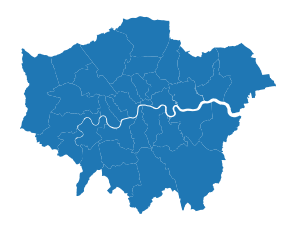

In [42]:
map_df.plot()
plt.axis('off')
plt.show()

In [43]:
map_df = map_df.set_index('NAME') # I convert the name of the borough to the index

In [44]:
boroughs = ['Kingston upon Thames', 'Croydon', 'Bromley', 'Hounslow', 'Ealing',
       'Havering', 'Hillingdon', 'Harrow', 'Brent', 'Barnet', 'Lambeth',
       'Southwark', 'Lewisham', 'Greenwich', 'Bexley', 'Enfield',
       'Waltham Forest', 'Redbridge', 'Sutton', 'Richmond upon Thames',
       'Merton', 'Wandsworth', 'Hammersmith and Fulham',
       'Kensington and Chelsea', 'Westminster', 'Camden', 'Tower Hamlets',
       'Islington', 'Hackney', 'Haringey', 'Newham', 'Barking and Dagenham']

In [45]:
boroughs = sorted(boroughs)

In [46]:
df_final.index = boroughs # I also convert the name of the borough to the index in the other dataframe

In [47]:
final_df = map_df.join(df_final) # Here I join both dataframes

In [48]:
final_df.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Percent Change,max_rank_pc,Abs Difference,max_rank_ad
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",525.65,17.00,"425,123.88",13.00
Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",418.17,31.00,"289,197.61",29.00
Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",426.54,29.00,"348,361.34",23.00
Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",485.67,20.00,"350,810.67",22.00
Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",468.34,24.00,"374,141.46",18.00


In [49]:
final_df['Center'] = final_df['geometry'].centroid # I create a column with the information of the center point of each borough

In [50]:
final = final_df.iloc[0:32,:] # I create a new dataframe without City of London to avoid distorting the values

In [51]:
import math

In [52]:
distance = final_df['Center'] # I convert the column center into a variable to use later (this includes City of London for calculation purposes)

In [53]:
from shapely.geometry import Point # This section converts each borough center into an array of two values, the last value is "City of London"

mypoints = distance

array = []
for points in mypoints:
    array.append([points.x, points.y])
nparray = np.array(array)

print(nparray)

[[519297.63480743 166820.01149016]
 [533290.15391939 163541.24357428]
 [542895.51160706 165655.52134039]
 [513515.50553611 175643.22431966]
 [515887.93777021 181715.49561693]
 [554049.03035596 187392.02498953]
 [507889.73861934 183652.82209232]
 [514986.70277627 190066.84311439]
 [520177.8684312  185829.51611615]
 [524027.59490347 192316.33976072]
 [530844.72197809 174356.42463529]
 [533820.59644757 176665.80158642]
 [537670.43474425 173980.73206632]
 [542908.095038   176875.73995774]
 [548794.41706061 175487.15607733]
 [532423.97127094 196420.83919357]
 [537758.13717925 190223.3883045 ]
 [543914.95788197 189465.00932989]
 [526976.87136261 164133.90368226]
 [517344.47123273 172813.84282441]
 [525476.21079901 169422.29619637]
 [526113.62999827 174045.07792197]
 [523572.67909909 178944.77463445]
 [525536.51356993 179622.98860677]
 [527686.06508517 181043.73348202]
 [527864.40445608 184664.06497432]
 [536398.88604067 181634.20964043]
 [531128.89245406 184980.01725446]
 [534371.59516136 18

In [54]:
center = nparray[-1,:] # This locates City of London as the center we will compare to

In [55]:
# math.hypot(center[0] - nparray[0,0], center[1] - nparray[0,1])

In [56]:
distances_from_center = [] # This calculates the distance between the center and teh other points and converts them into a list

for x,y in nparray:
    result = math.hypot(center[0] - x, center[1] - y)
    distances_from_center.append(result)


In [57]:
distances_from_center   

[19560.681087814006,
 17749.10577236297,
 18771.247040011753,
 19781.79441396611,
 16597.626482380794,
 22420.8747612595,
 24704.899107588433,
 19579.449027710434,
 13118.913728077216,
 13907.482872952582,
 7106.040598402085,
 4797.260652355524,
 8950.1158922414,
 11317.174821278208,
 17309.95817273379,
 15149.108141958539,
 10391.965041783096,
 14067.507810860157,
 17999.695097279247,
 17338.129692474795,
 13764.427339168653,
 9630.783695584792,
 9205.92415503792,
 7136.217752952698,
 4798.992403565669,
 5727.789728585357,
 3935.9696068804938,
 3946.533876936058,
 4619.055262843654,
 8468.70334082458,
 9047.046117941762,
 16021.558493996203,
 0.0]

In [58]:
distances_from_center = distances_from_center[0:-1] # This takes out "City of London" from the list

In [59]:
final['distance_from_center'] = distances_from_center # This adds the values to our final dataframe

<ipython-input-59-80651048c1e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['distance_from_center'] = distances_from_center # This adds the values to our final dataframe


In [60]:
final['max_rank_distance'] = final['distance_from_center'].rank(method='min', ascending=True) # Generates a rank column for "distance"

<ipython-input-60-85b884eeec7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['max_rank_distance'] = final['distance_from_center'].rank(method='min', ascending=True) # Generates a rank column for "distance"


In [61]:
final.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Percent Change,max_rank_pc,Abs Difference,max_rank_ad,Center,distance_from_center,max_rank_distance
NAME,,,,,,,,,,,,,,
Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",525.65,17.00,"425,123.88",13.00,POINT (519297.635 166820.011),"19,560.68",28.00
Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",418.17,31.00,"289,197.61",29.00,POINT (533290.154 163541.244),"17,749.11",25.00
Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",426.54,29.00,"348,361.34",23.00,POINT (542895.512 165655.521),"18,771.25",27.00
Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",485.67,20.00,"350,810.67",22.00,POINT (513515.506 175643.224),"19,781.79",30.00
Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",468.34,24.00,"374,141.46",18.00,POINT (515887.938 181715.496),"16,597.63",22.00


In [62]:
final = final.iloc[:,np.r_[7:11,12:14]] # I select the columns that interest us

In [63]:
final.sort_values('max_rank_pc', ascending=True) # I sort the values using the 2nd column

,Percent Change,max_rank_pc,Abs Difference,max_rank_ad,distance_from_center,max_rank_distance
NAME,,,,,,
Hackney,941.96,1.00,"577,386.61",5.00,"4,619.06",3.00
Westminster,715.64,2.00,"951,987.42",2.00,"4,798.99",5.00
Tower Hamlets,689.54,3.00,"412,796.62",15.00,"3,935.97",1.00
Lambeth,675.39,4.00,"457,716.11",10.00,"7,106.04",7.00
Kensington and Chelsea,664.17,5.00,"1,213,407.40",1.00,"7,136.22",8.00
Haringey,641.07,6.00,"489,054.95",9.00,"8,468.70",9.00
Camden,628.58,7.00,"760,163.07",3.00,"5,727.79",6.00
Newham,623.44,8.00,"333,786.91",26.00,"9,047.05",11.00
Southwark,619.76,9.00,"420,724.35",14.00,"4,797.26",4.00


## Visualizations

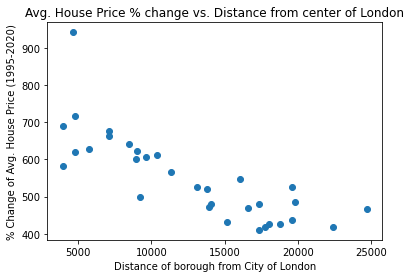

In [64]:
y = np.array(final['Percent Change'])
x = np.array(final['distance_from_center'])

plt.scatter(x,y)
plt.xlabel('Distance of borough from City of London')
plt.ylabel('% Change of Avg. House Price (1995-2020)')
plt.title('Avg. House Price % change vs. Distance from center of London')
plt.show()

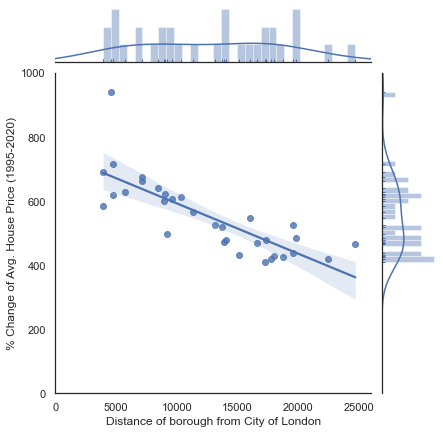

In [65]:
import seaborn as sns 
sns.set(style="white", color_codes=True)
g = sns.jointplot(x,y, kind='reg', marginal_kws=dict(bins=32, rug=True))
plt.ylim(0, 1000)
plt.xlim(0, 26000)
plt.xlabel('Distance of borough from City of London')
plt.ylabel('% Change of Avg. House Price (1995-2020)')
plt.show()


In [66]:
from scipy.stats import pearsonr, linregress
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)
print(linregress(x, y))

Pearsons correlation: -0.802
LinregressResult(slope=-0.015708915452211845, intercept=750.0836546440067, rvalue=-0.8023022279321573, pvalue=3.354538371023764e-08, stderr=0.0021338420738142867)


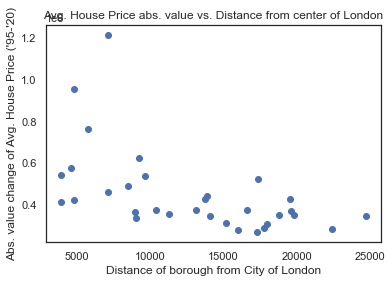

In [67]:
y = np.array(final['Abs Difference'])
x = np.array(final['distance_from_center'])

plt.scatter(x,y)
plt.xlabel('Distance of borough from City of London')
plt.ylabel('Abs. value change of Avg. House Price (\'95-\'20)')
plt.title('Avg. House Price abs. value vs. Distance from center of London')
plt.show()

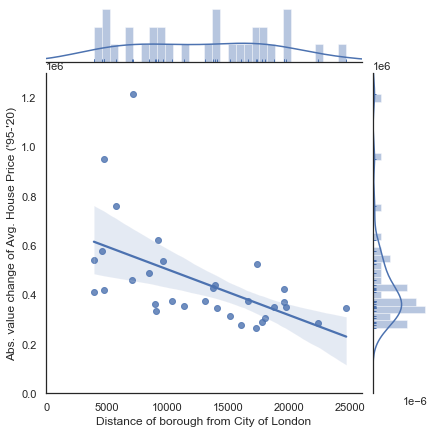

In [68]:
import seaborn as sns 
sns.set(style="white", color_codes=True)
g = sns.jointplot(x,y, kind='reg', marginal_kws=dict(bins=32, rug=True))
plt.ylim(0, 1300000)
plt.xlim(0, 26000)
plt.xlabel('Distance of borough from City of London')
plt.ylabel('Abs. value change of Avg. House Price (\'95-\'20)')
plt.show()


In [69]:
from scipy.stats import pearsonr, linregress
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)
print(linregress(x, y))

Pearsons correlation: -0.545
LinregressResult(slope=-18.547534827057724, intercept=688054.8808999397, rvalue=-0.5446655621390194, pvalue=0.0012682653037216142, stderr=5.214085306154564)


In [70]:
df_points = final_df.copy()

In [71]:
df_points.set_geometry('Center', inplace=True)

1

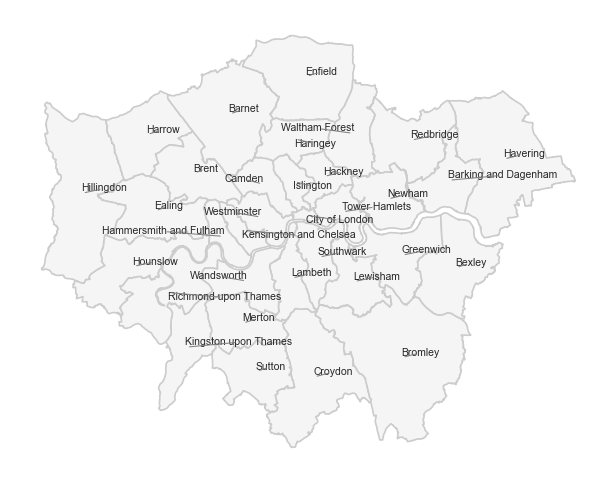

In [72]:
fig = plt.figure(dpi=150)

ax = final_df.plot(figsize = (18,14), color='whitesmoke', linewidth=0.8, ax= plt.gca(), edgecolor='0.8')
ax.axis('off')
texts = []

for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points.index):
    texts.append(plt.text(x, y,label,fontsize= 5))
    
adjustText.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle='-',color='grey', lw=0.5))


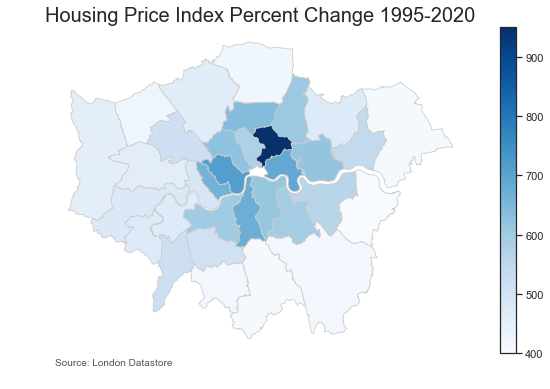

In [73]:
# variable
variable = 'Percent Change'

# range for the choropleth
vmin, vmax = 400, 950

# figures and exes for matplotlib
fig, ax = plt.subplots(1, figsize = (10,6))

# create map
final_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add title
ax.set_title('Housing Price Index Percent Change 1995-2020', fontdict={'fontsize':'20','fontweight':'3'})

# annotation for data source
ax.annotate('Source: London Datastore',
           xy=(0.1,.08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# colorband legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


1

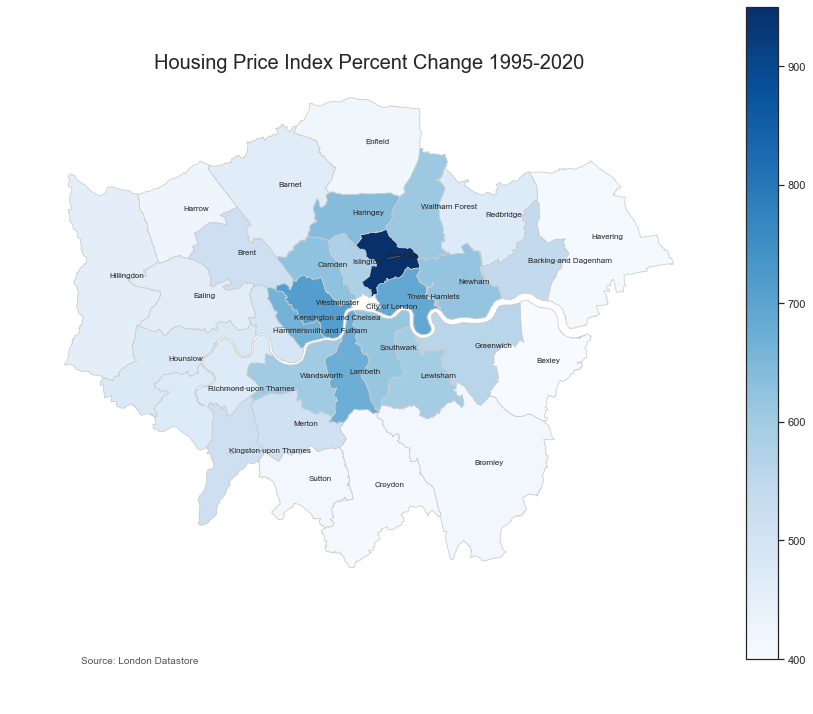

In [74]:
# variable
variable = 'Percent Change'

# range for the choropleth
vmin, vmax = 400, 950

# figures and exes for matplotlib
fig, ax = plt.subplots(1, figsize = (15,12))

# create map
final_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add title
ax.set_title('Housing Price Index Percent Change 1995-2020', fontdict={'fontsize':'20','fontweight':'3'})

# annotation for data source
ax.annotate('Source: London Datastore',
           xy=(0.1,.08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# colorband legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

texts = []

for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points.index):
    texts.append(plt.text(x, y,label,fontsize= 8))
    
adjustText.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle='-',color='grey', lw=0.5))


<b><font color='red'>Is there a way to show some of the labels in white if the background is too dark?</font></b> 

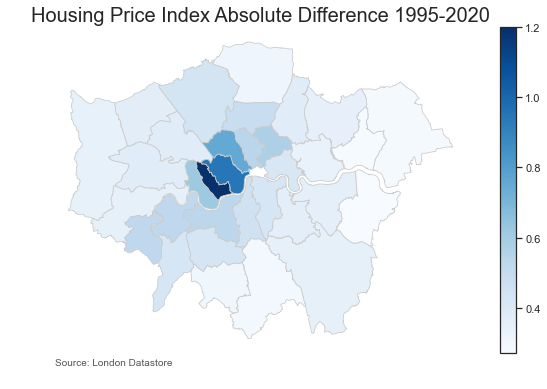

In [75]:
# variable
variable = 'Abs Difference'

# range for the choropleth
vmin, vmax = 0.27, 1.2

# figures and exes for matplotlib
fig, ax = plt.subplots(1, figsize = (10,6))

# create map
final_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add title
ax.set_title('Housing Price Index Absolute Difference 1995-2020', fontdict={'fontsize':'20','fontweight':'3'})

# annotation for data source
ax.annotate('Source: London Datastore',
           xy=(0.1,.08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# colorband legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


In [76]:
round((final_df['Abs Difference'].max())/1000000,2)

1.21

In [77]:
round((final_df['Abs Difference'].min())/1000000,2)

0.27

1

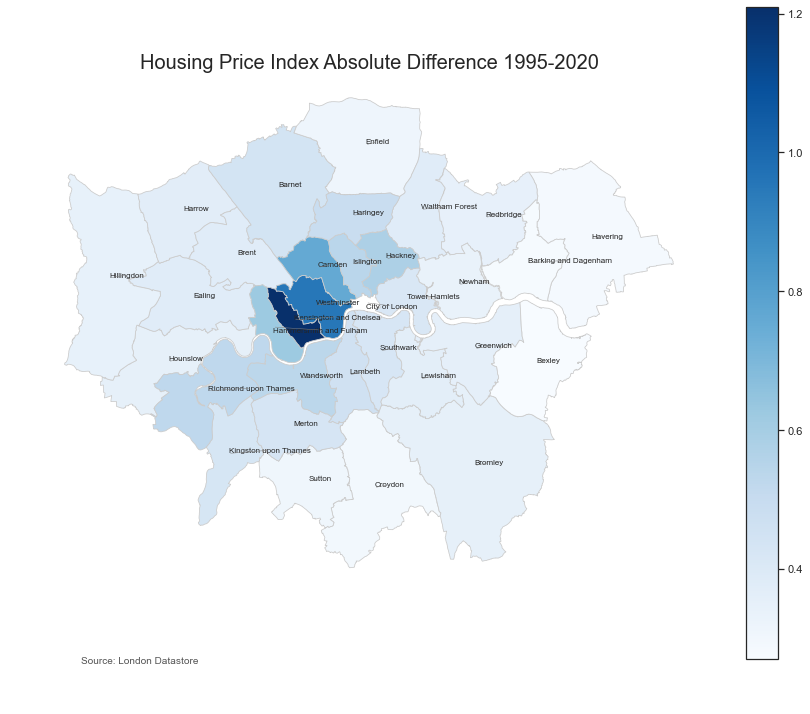

In [78]:
# variable
variable = 'Abs Difference'

# range for the choropleth
vmin, vmax = 0.27, 1.21

# figures and exes for matplotlib
fig, ax = plt.subplots(1, figsize = (15,12))

# create map
final_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add title
ax.set_title('Housing Price Index Absolute Difference 1995-2020', fontdict={'fontsize':'20','fontweight':'3'})

# annotation for data source
ax.annotate('Source: London Datastore',
           xy=(0.1,.08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# colorband legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

texts = []

for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points.index):
    texts.append(plt.text(x, y,label,fontsize= 8))
    
adjustText.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle='-',color='grey', lw=0.5))


<br>

**Borough Price Evolution**

In [79]:
df['Year'] = pd.DatetimeIndex(df['Date']).year  # I create the "year" column

In [80]:
df.head()

,Date,Borough,Avg. Price,Year
0,1995-01-01,Barking & Dagenham,"50,460.23",1995
1,1995-02-01,Barking & Dagenham,"51,085.78",1995
2,1995-03-01,Barking & Dagenham,"51,268.97",1995
3,1995-04-01,Barking & Dagenham,"53,133.51",1995
4,1995-05-01,Barking & Dagenham,"53,042.25",1995


In [81]:
df_borough_year = df.groupby(['Borough','Year']).mean() # I group the values by borough and year just to avoid having so many values

In [82]:
df_borough_year.head()

Avg. Price
Borough            Year            
Barking & Dagenham 1995   51,817.97
                   1996   51,718.19
                   1997   55,974.26
                   1998   60,285.82
                   1999   65,320.93

In [83]:
df_borough_year = df_borough_year.unstack() # I findit easier to analyse an unstacked table

In [84]:
df_borough_year.tail()

Avg. Price                                              \
Year                 1995       1996       1997       1998       1999   
Borough                                                                 
Sutton          70,291.30  71,651.92  81,094.12  92,087.05 100,869.81   
Tower Hamlets   63,652.45  70,094.72  85,759.56  96,505.17 113,035.29   
Waltham Forest  61,279.98  62,177.24  68,228.79  75,557.47  83,821.59   
Wandsworth      88,829.08  92,270.04 108,108.36 125,406.81 145,339.81   
Westminster    133,689.23 139,188.76 165,447.59 190,531.95 214,042.70   

                                                                       ...  \
Year                 2000       2001       2002       2003       2004  ...   
Borough                                                                ...   
Sutton         125,952.05 137,910.19 162,526.66 187,815.76 201,829.27  ...   
Tower Hamlets  141,287.78 162,505.94 187,288.51 207,901.58 219,986.89  ...   
Waltham Forest 103,030.68 118,843.46 148,137.48 175,075.87 191,377.78  ...   
Wandsworth     184,275.84 205,179.66 232,805.56 253,342.48 271,649.72  ...   
Westminster    260,492.25 296,105.50 339,622.39 363,466.03 379,395.35  ...   

                                                                       \
Year                 2011       2012       2013       2014       2015   
Borough                                                                 
Sutton         233,026.68 238,842.18 252,002.84 291,132.06 322,932.14   
Tower Hamlets  287,262.48 285,452.97 309,051.04 382,241.69 421,943.84   
Waltham Forest 220,905.44 230,726.51 254,265.27 314,934.40 357,513.37   
Wandsworth     386,200.19 409,392.05 457,404.06 544,515.00 572,691.16   
Westminster    632,513.60 696,926.04 789,972.48 922,702.24 964,643.07   

                                                                             
Year                 2016         2017         2018       2019         2020  
Borough                                                                      
Sutton         365,303.13   376,924.58   379,262.58 371,874.96   374,482.20  
Tower Hamlets  457,129.60   459,279.06   446,500.55 438,460.95   470,269.51  
Waltham Forest 413,149.27   436,116.50   440,859.41 430,501.95   440,327.46  
Wandsworth     608,740.91   617,921.48   596,649.14 588,613.05   612,122.08  
Westminster    995,543.36 1,064,771.60 1,020,025.25 955,352.47 1,043,060.29  

[5 rows x 26 columns]

In [85]:
df_borough_year.columns = df_borough_year.columns.droplevel(0) # Drop column level 0

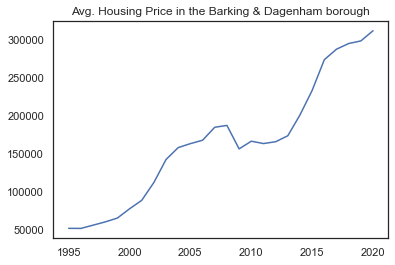

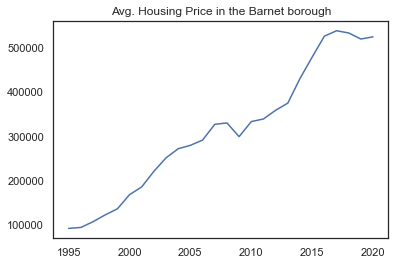

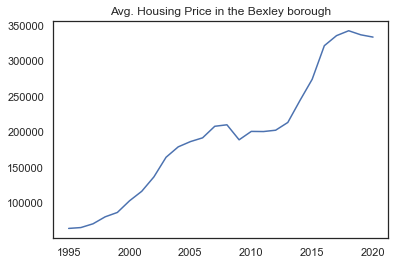

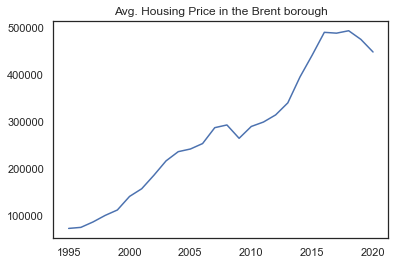

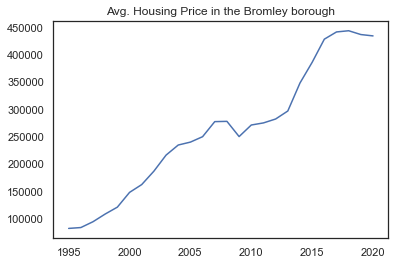

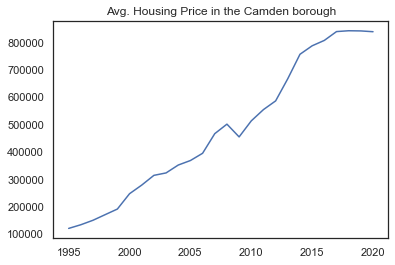

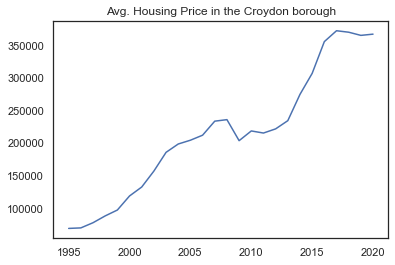

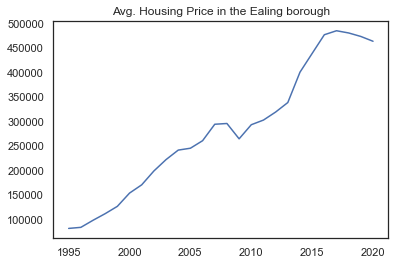

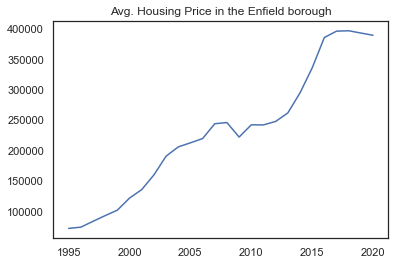

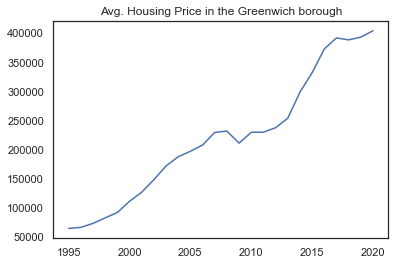

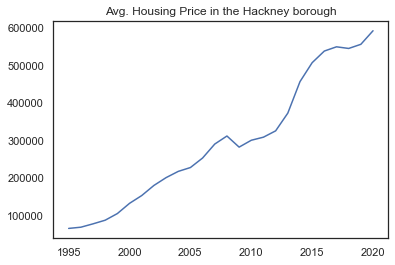

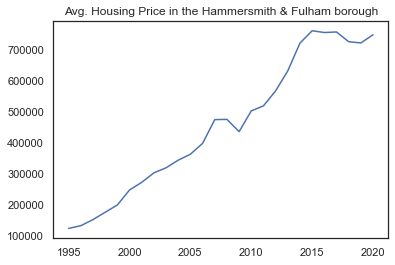

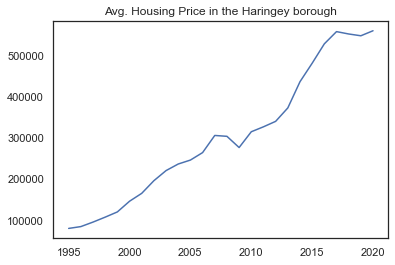

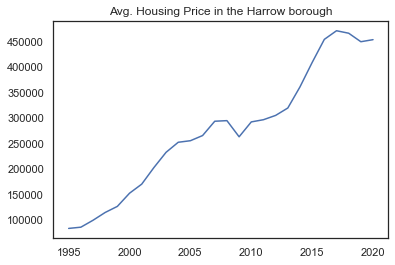

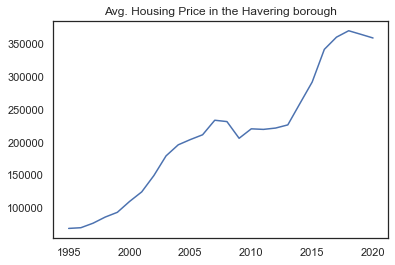

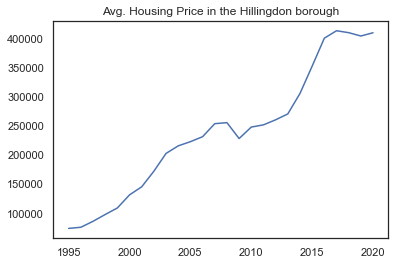

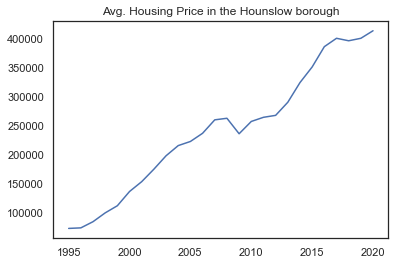

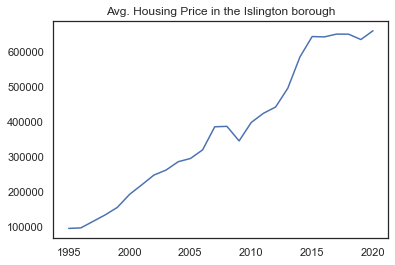

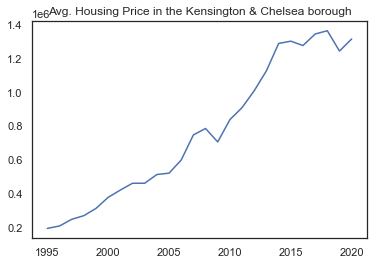

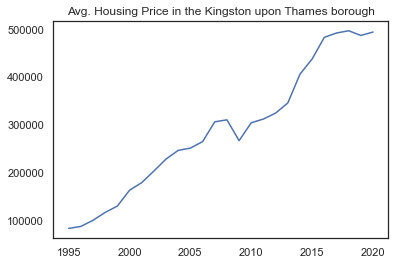

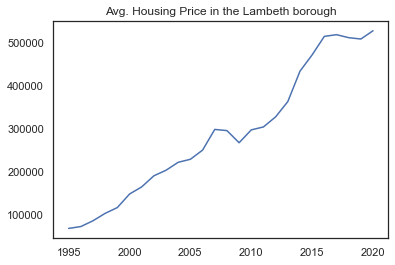

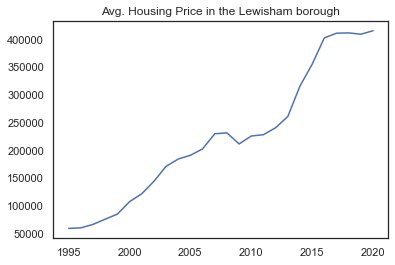

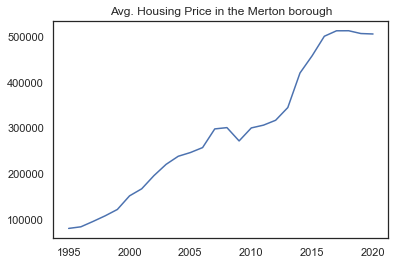

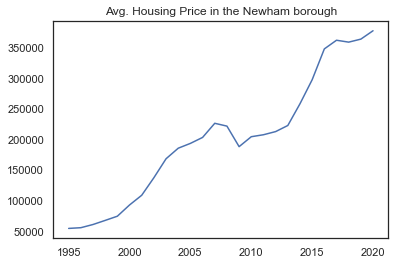

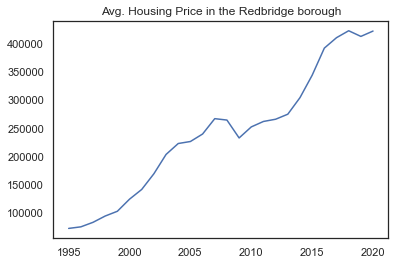

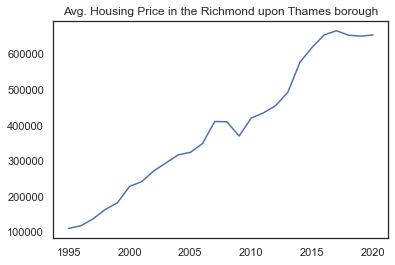

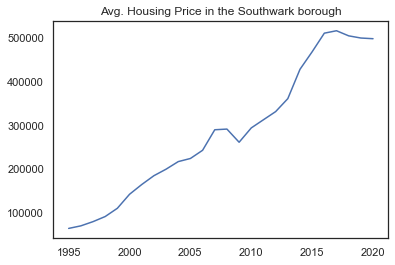

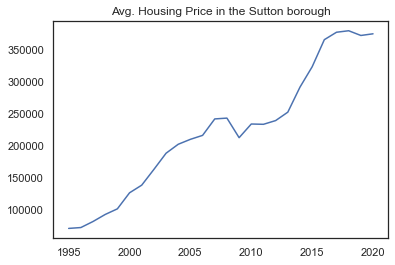

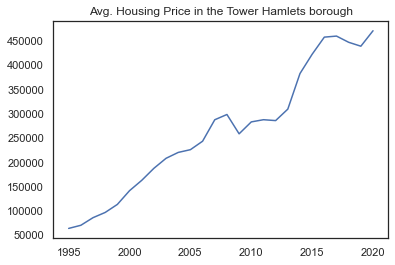

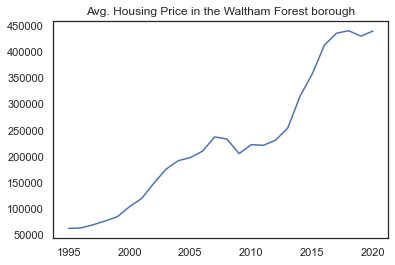

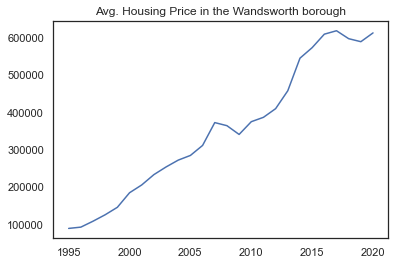

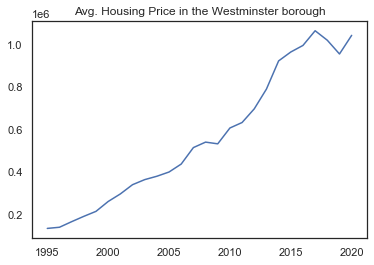

In [86]:
for i in range(0,32):

    label = df_borough_year.index[i]
    y_values = df_borough_year.iloc[i,:].values
    x_values = df_borough_year.iloc[i,:].index

    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x_values, y_values)
    

    plt.title('Avg. Housing Price in the {} borough'.format(label))
    
    plt.show()
    
    #fig.savefig('{} House Price Index Evolution 1995-2020'.format(label),dpi=300)

<b><font color='red'>I have hidden the graphs above. I wanted to make them as a matrix 8x4 but was not able, so currently 32 print out. Maybe you can give me some feedback on that point. Also the Kensington & Chelsea Borough has large values and I cannot change the ticks to be the same as the rest.</font></b>

## Analysis Left Out

In [38]:
df_ratio = df[date_selection] # The document also asked to calculate the ratio, the next few lines do that

In [39]:
df_max = df_ratio.groupby('Borough').max()

In [40]:
df_min = df_ratio.groupby('Borough').min()

In [41]:
growth_ratio = [df_max['Avg. Price']/df_min['Avg. Price']]

In [42]:
growth_ratio

[Borough
 Barking & Dagenham      6.48
 Barnet                  5.71
 Bexley                  5.11
 Brent                   6.27
 Bromley                 5.27
 Camden                  7.29
 Croydon                 5.18
 Ealing                  5.68
 Enfield                 5.32
 Greenwich               6.67
 Hackney                10.42
 Hammersmith & Fulham    5.98
 Haringey                7.41
 Harrow                  5.36
 Havering                5.19
 Hillingdon              5.66
 Hounslow                5.86
 Islington               6.83
 Kensington & Chelsea    7.64
 Kingston upon Thames    6.26
 Lambeth                 7.75
 Lewisham                7.01
 Merton                  6.21
 Newham                  7.23
 Redbridge               5.80
 Richmond upon Thames    5.79
 Southwark               7.20
 Sutton                  5.28
 Tower Hamlets           7.90
 Waltham Forest          7.13
 Wandsworth              7.06
 Westminster             8.16
 Name: Avg. Price, dtype: float

Index(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
       'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon',
       'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames',
       'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='Borough')



Please select a borough from the list above Westminster


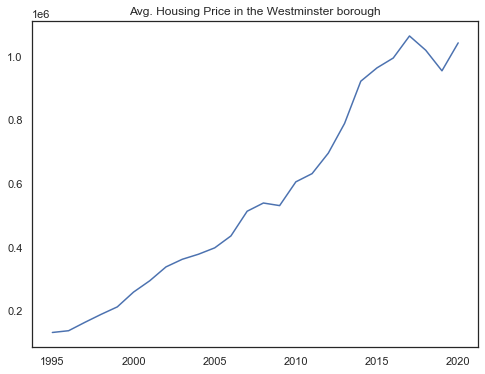

In [496]:
print(df_borough_year.index)
print()
select_borough = ''
while select_borough not in df_borough_year.index:
    select_borough = input('Please select a borough from the list above')

i = df_borough_year.index.get_loc(select_borough)

label = df_borough_year.index[i]
y_values = df_borough_year.iloc[i,:].values
x_values = df_borough_year.iloc[i,:].index

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_values, y_values)
ax.set_title('Avg. Housing Price in the {} borough'.format(label))

print()
plt.show()